In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [5]:
# Load the data
data_with_coords = pd.read_csv("E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/all_leks_scores_unk_loc_leks_for_model.csv")
data = data_with_coords.drop(columns = ['lek', 'within_2000m', 'w_in_2000_not_active','within_4800m'])
data = data[['still_active', 'y_northing', 'x_easting']]
# Display the first few rows of the data
data.head()

,still_active,y_northing,x_easting
0,1,3730500,672527
1,0,3729786,669625
2,1,3731230,670774
3,1,3727387,673996
4,1,3728666,675163


In [6]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('still_active', axis=1)
y = data['still_active']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42) #test size orginally 0.3

In [7]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


,still_active,y_northing,x_easting
10,1,3727928,677189
1138,0,3718559,619832
540,0,3704579,644830
68,0,3712342,612215
1304,0,3714293,649863


In [9]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42, early_stopping_rounds=10)
stq_model.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.59902
[1]	validation_0-logloss:0.55661
[2]	validation_0-logloss:0.52913
[3]	validation_0-logloss:0.50915
[4]	validation_0-logloss:0.50051
[5]	validation_0-logloss:0.48997


[6]	validation_0-logloss:0.47678
[7]	validation_0-logloss:0.46840
[8]	validation_0-logloss:0.45901
[9]	validation_0-logloss:0.45793
[10]	validation_0-logloss:0.45504
[11]	validation_0-logloss:0.44949
[12]	validation_0-logloss:0.44858
[13]	validation_0-logloss:0.44564
[14]	validation_0-logloss:0.44371
[15]	validation_0-logloss:0.43742
[16]	validation_0-logloss:0.43741
[17]	validation_0-logloss:0.43406
[18]	validation_0-logloss:0.43302
[19]	validation_0-logloss:0.43193
[20]	validation_0-logloss:0.43285
[21]	validation_0-logloss:0.43403
[22]	validation_0-logloss:0.43708
[23]	validation_0-logloss:0.43614
[24]	validation_0-logloss:0.43664
[25]	validation_0-logloss:0.43942
[26]	validation_0-logloss:0.43984
[27]	validation_0-logloss:0.44312
[28]	validation_0-logloss:0.44452


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 80.39%


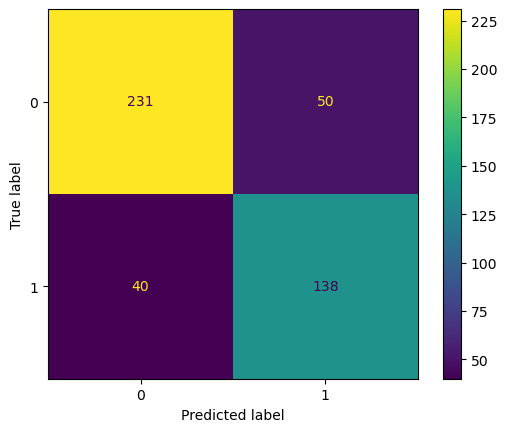

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate accuracy
accuracy_og = stq_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy_og * 100.0))
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
"""
 # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [0],
    "reg_lambda" : [1],
    "scale_pos_weight" : [5, 7, 9],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                              early_stopping_rounds = 10,
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_1,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 5}


c:\Users\Justin\miniconda3\envs\graph_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast


In [11]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            early_stopping_rounds = 10,
                            seed = 42, 
                            max_depth = 5, # how deep the tree will go
                            learning_rate = 0.1, # also known as eta
                            gamma = 0, # originally 
                            reg_lambda = 1, # was set to 
                            scale_pos_weight = 1.56, #sum(negative instances) / sum(positive instances) - was set to 2.95
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.66678
[1]	validation_0-logloss:0.64620
[2]	validation_0-logloss:0.62915
[3]	validation_0-logloss:0.61227
[4]	validation_0-logloss:0.59851
[5]	validation_0-logloss:0.58919
[6]	validation_0-logloss:0.58034
[7]	validation_0-logloss:0.56885
[8]	validation_0-logloss:0.56051
[9]	validation_0-logloss:0.55269
[10]	validation_0-logloss:0.54563
[11]	validation_0-logloss:0.54202
[12]	validation_0-logloss:0.53592
[13]	validation_0-logloss:0.53042
[14]	validation_0-logloss:0.52523
[15]	validation_0-logloss:0.51890
[16]	validation_0-logloss:0.51264
[17]	validation_0-logloss:0.50975
[18]	validation_0-logloss:0.50685
[19]	validation_0-logloss:0.50502
[20]	validation_0-logloss:0.50044
[21]	validation_0-logloss:0.49862
[22]	validation_0-logloss:0.49682
[23]	validation_0-logloss:0.49592
[24]	validation_0-logloss:0.49551
[25]	validation_0-logloss:0.49396
[26]	validation_0-logloss:0.49216
[27]	validation_0-logloss:0.48950
[28]	validation_0-logloss:0.48828
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

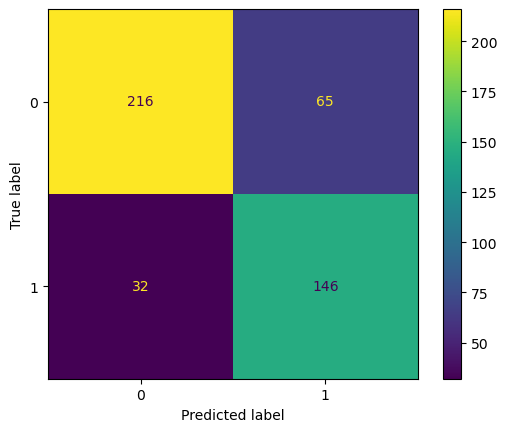

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [13]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.87%


In [14]:
from sklearn.metrics import classification_report
# Make prediction on the testing data
y_pred = stq_model_2.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       248
           1       0.82      0.69      0.75       211

    accuracy                           0.79       459
   macro avg       0.79      0.78      0.78       459
weighted avg       0.79      0.79      0.79       459



In [11]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

In [15]:
from sklearn.metrics import roc_auc_score
y_pred_proba = stq_model_2.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.8673977368147466

### Finding and exportin gthe correctly and incorrectly tested data

In [13]:
folder_directory = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/xgb_model_predictions"
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)
#predict proba
#y_pred = stq_model_2.predict_proba(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

#print("Rows predicted correctly with original target:")
#print(correctly_predicted_rows_with_target)

#print("\nRows predicted incorrectly with original target:")
#print(incorrectly_predicted_rows_with_target)

# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,still_active
0,0.945,205.105,0.631,191.884,0.711,489.789,0.561,3651.066,0.000,92.00,0.000,1027.520,1
4,0.922,173.611,0.601,135.845,0.762,620.600,0.770,3350.399,0.000,10.00,0.010,466.184,1
8,0.942,195.483,0.722,314.232,0.875,493.772,0.983,950.641,0.486,427.13,0.804,282.836,1
9,0.945,199.831,0.752,459.663,0.934,827.760,0.906,3054.429,0.391,0.00,0.597,24407.657,0
10,0.902,156.691,0.562,86.236,0.744,320.279,0.236,2733.001,0.000,0.00,0.000,3395.110,1


In [14]:
# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = f"{folder_directory}/xgb_cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)


# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = f"{folder_directory}/xgb_incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV files have been successfully saved.")

CSV files have been successfully saved.


In [15]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.49336909548223035

In [16]:

import shap

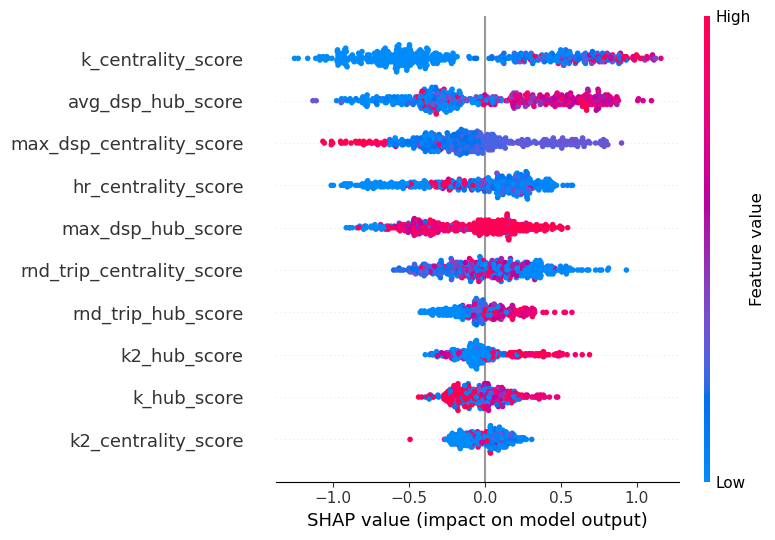

In [17]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

In [ ]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

In [ ]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

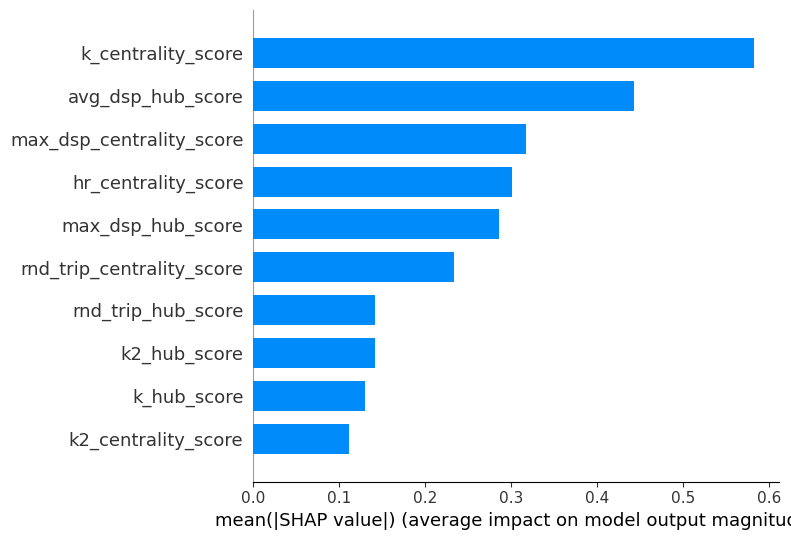

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

# Testing a Random Forests model

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_with_coords = pd.read_csv("E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/all_leks_scores_unk_loc_leks_for_model.csv")
data = data_with_coords.drop(columns = ['lek', 'y_northing', 'x_easting', 'within_2000m', 'w_in_2000_not_active','within_4800m'])
# Display the first few rows of the data
data.head()

from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('still_active', axis=1)
y = data['still_active']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42) #test size orginally 0.3

# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators= 1000, criterion = "log_loss", max_depth=9, max_features = 0.3, max_samples=0.9,
                             bootstrap = True, class_weight = "balanced_subsample") # originally ran with all defaults parameters.
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


Testing set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       301
           1       0.68      0.77      0.72       158

    accuracy                           0.80       459
   macro avg       0.77      0.79      0.78       459
weighted avg       0.80      0.80      0.80       459



In [26]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_
print(model)

RandomForestClassifier(max_depth=9, max_features=0.30000000000000004,
                       max_samples=0.5, n_estimators=80)


In [2]:
from sklearn.metrics import log_loss, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:,1]
log_loss(y_test, y_pred_proba)
#roc_auc_score(y_test, y_pred_proba)

0.45704147815187557

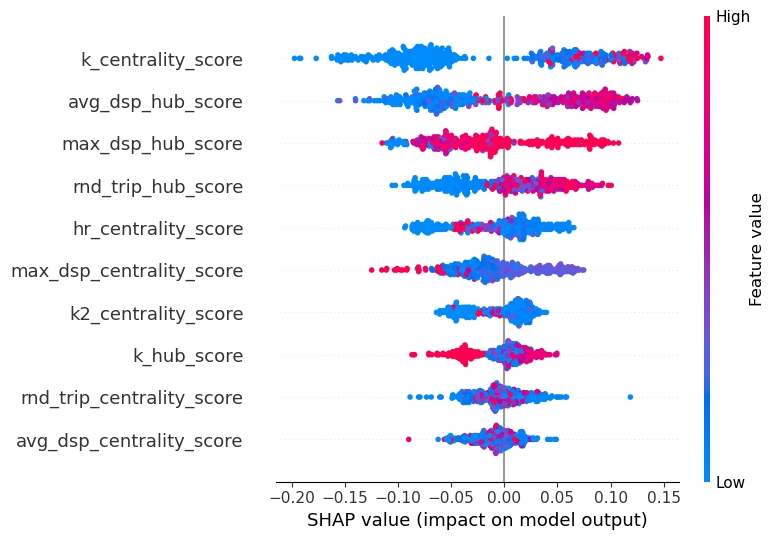

In [4]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
# Option 1: Plot for a specific class
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[:, :, 1],  # Select SHAP values for the second class
    X_test,  
    max_display=10,  # Top 5 features
    plot_type='dot'
)
#plt.title('SHAP Summary Plot for Positive Class')
#plt.tight_layout()
#plt.show()

In [6]:
# Get probability predictions (column index 1 gives probability of still being active)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probability of being active

# Add probabilities to DataFrame
data_with_coords.loc[test_indices, 'probability_active'] = y_proba

# Print a preview
print(data_with_coords.head())

import geopandas as gpd
from shapely.geometry import Point

# Convert to GeoDataFrame
geometry = [Point(x, y) for x, y in zip(data_with_coords['x_easting'], data_with_coords['y_northing'])]
gdf = gpd.GeoDataFrame(data_with_coords, geometry=geometry, crs="EPSG:26913")

# Convert UTM to WGS84 (latitude/longitude)
gdf = gdf.to_crs("EPSG:4326")

# Print first few rows with probability
print(gdf[['lek', 'geometry', 'probability_active']].head())

gdf[['lek', 'y_northing', 'x_easting', 'probability_active']].to_csv("E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/predicted_activity_probabilities.csv", index=False)


   lek  y_northing  x_easting  max_dsp_hub_score  max_dsp_centrality_score  \
0    2     3730500     672527              0.945                   205.105   
1    4     3729786     669625              0.958                   224.770   
2    5     3731230     670774              0.955                   219.368   
3    6     3727387     673996              0.931                   182.535   
4    7     3728666     675163              0.922                   173.611   

   avg_dsp_hub_score  avg_dsp_centrality_score  rnd_trip_hub_score  \
0              0.631                   191.884               0.711   
1              0.758                   687.098               0.762   
2              0.684                   372.106               0.685   
3              0.657                   212.460               0.820   
4              0.601                   135.845               0.762   

   rnd_trip_centrality_score  hr_hub_score  hr_centrality_score  k_hub_score  \
0                    489.789  

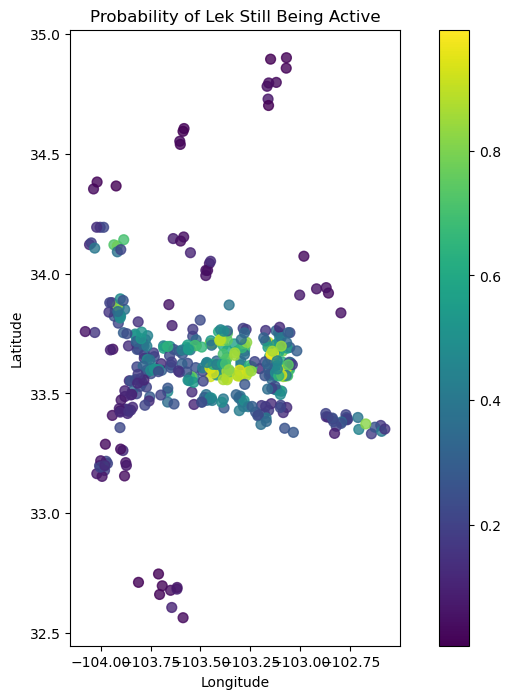

In [7]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='probability_active', cmap='viridis', markersize=50, legend=True, alpha=0.8, ax=ax)


# Labels
ax.set_title("Probability of Lek Still Being Active")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [22]:
folder_directory = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/unk_loc_leks/rf_model_predictions"
# Make predictions on the test dataset
y_pred = stq_model_2.predict(X_test)
#predict proba
#y_pred = stq_model_2.predict_proba(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

#print("Rows predicted correctly with original target:")
#print(correctly_predicted_rows_with_target)

#print("\nRows predicted incorrectly with original target:")
#print(incorrectly_predicted_rows_with_target)

# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = f"{folder_directory}/unk_lek_rf_cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)


# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = f"{folder_directory}/unk_lek_rf_incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV files have been successfully saved.")

CSV files have been successfully saved.


Model Performance Comparison:
           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest  0.784314   0.758170  0.651685  0.700906  0.871566
1        XGBoost  0.764706   0.696629  0.696629  0.696629  0.836159


<Figure size 1000x600 with 0 Axes>

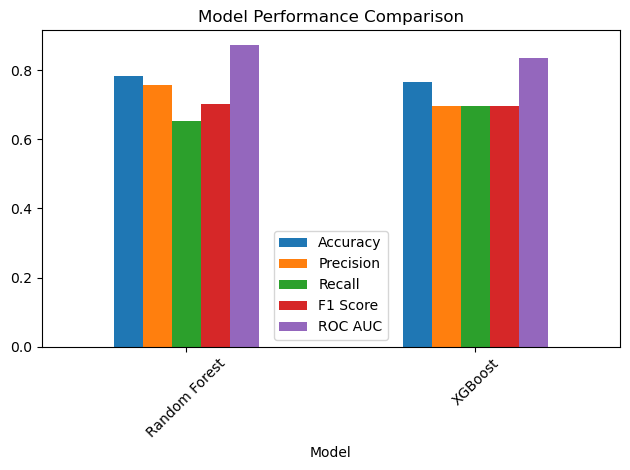

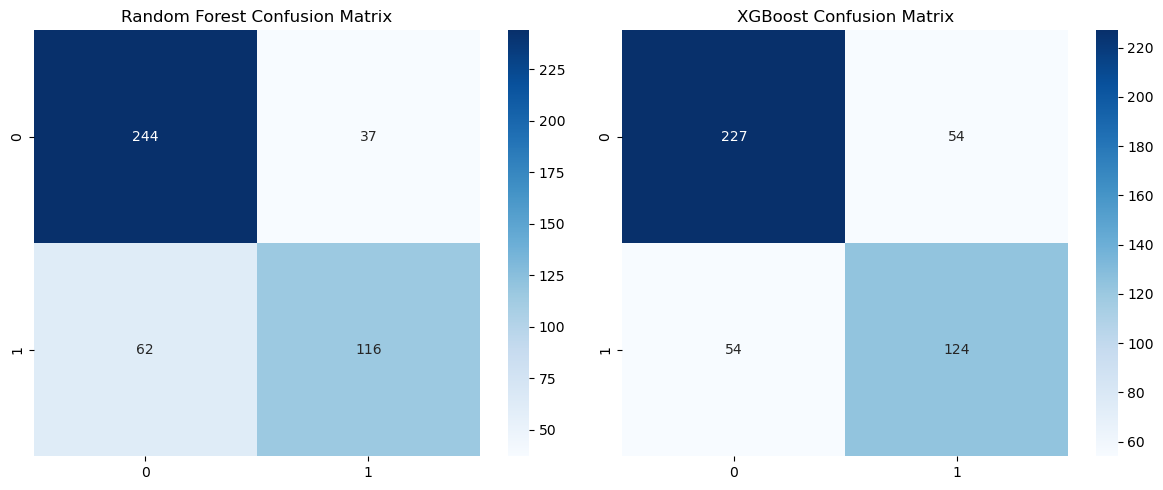


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       281
           1       0.76      0.65      0.70       178

    accuracy                           0.78       459
   macro avg       0.78      0.76      0.77       459
weighted avg       0.78      0.78      0.78       459


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       281
           1       0.70      0.70      0.70       178

    accuracy                           0.76       459
   macro avg       0.75      0.75      0.75       459
weighted avg       0.76      0.76      0.76       459



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# Function to evaluate and compare models
def compare_models(rf_model, xgb_model, X_test, y_test):
    # Predictions
    rf_pred = rf_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    
    # Probabilities for ROC AUC
    rf_proba = rf_model.predict_proba(X_test)[:, 1]
    xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # Metrics dictionary
    metrics = {
        'Model': ['Random Forest', 'XGBoost'],
        'Accuracy': [
            accuracy_score(y_test, rf_pred),
            accuracy_score(y_test, xgb_pred)
        ],
        'Precision': [
            precision_score(y_test, rf_pred),
            precision_score(y_test, xgb_pred)
        ],
        'Recall': [
            recall_score(y_test, rf_pred),
            recall_score(y_test, xgb_pred)
        ],
        'F1 Score': [
            f1_score(y_test, rf_pred),
            f1_score(y_test, xgb_pred)
        ],
        'ROC AUC': [
            roc_auc_score(y_test, rf_proba),
            roc_auc_score(y_test, xgb_proba)
        ]
    }
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(metrics)
    print("Model Performance Comparison:")
    print(comparison_df)
    
    # Visualization of metrics
    plt.figure(figsize=(10, 6))
    comparison_df.set_index('Model').plot(kind='bar', rot=45)
    plt.title('Model Performance Comparison')
    plt.tight_layout()
    plt.show()
    
    # Confusion Matrices
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, rf_pred), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, xgb_pred), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('XGBoost Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed Classification Report
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_pred))
    
    print("\nXGBoost Classification Report:")
    print(classification_report(y_test, xgb_pred))
    
    return comparison_df

# Run the comparison
comparison_results = compare_models(clf, stq_model_2, X_test, y_test)